In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# read dataset using pandas

data = pd.read_csv("../Capstone_Three_Dataset/spam.csv", encoding='latin-1')
data.dropna(how="any", inplace=True, axis=1)
data.columns = ['type', 'message']
data.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
data.describe()

,type,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
data.groupby('type').describe()

message                                                               
       count unique                                                top freq
type                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [6]:
# convert spam/ham to numerical type

data['value'] = data.type.map({'ham':0, 'spam':1})
data.head()

,type,message,value
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
data['message_length'] = data.message.apply(len)
data.head()

,type,message,value,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [8]:
#split count of ham and spam

ham = data['message_length'][data['type']=='ham'].value_counts()
spam =data['message_length'][data['type']=='spam'].value_counts()
df_ham=pd.DataFrame(ham)
df_spam=pd.DataFrame(spam)

Text(0, 0.5, 'Frequency')

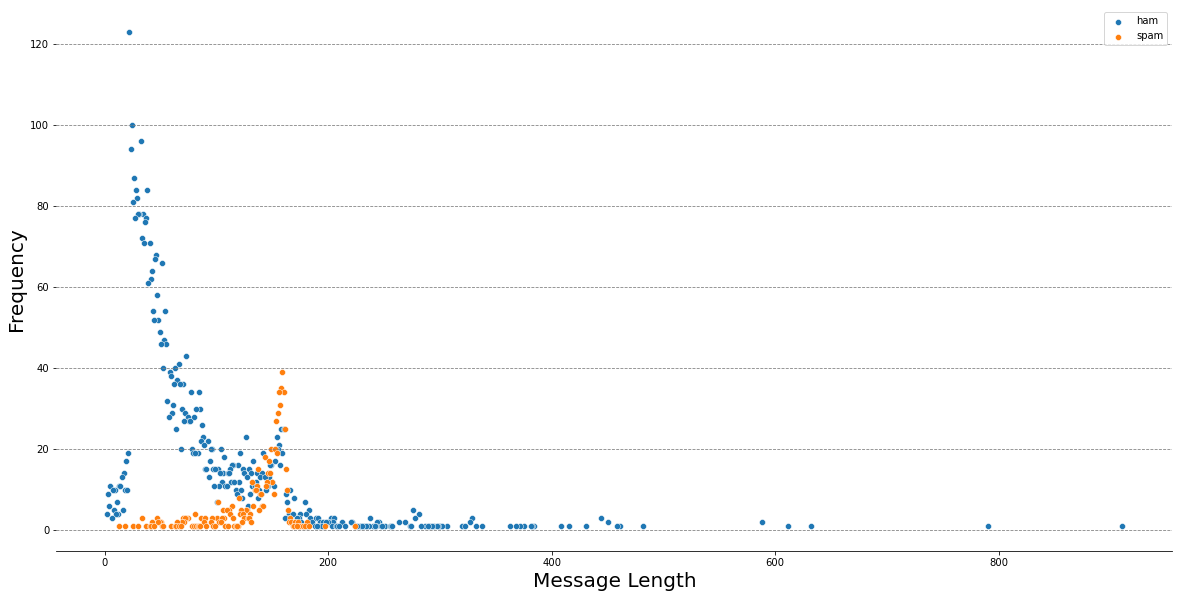

In [9]:
fig=plt.figure(figsize=(20,10))


ax=plt.axes()
ax.set_facecolor("white")
fig.patch.set_color("white")

#Dealing with spines
for i in ['left','top','right']:
    ax.spines[i].set_visible(False)
    
ax.grid(linestyle="--",axis='y',color='gray')


sns.scatterplot(data=df_ham,x=df_ham.index,y=df_ham['message_length'],label="ham")
sns.scatterplot(data=df_spam,x=df_spam.index,y=df_spam['message_length'],label='spam')
plt.xlabel("Message Length",fontsize=20)
plt.ylabel("Frequency",fontsize=20)

#spam has more characters

In [10]:
data[data.type=='ham'].describe()

,value,message_length
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [11]:
data[data.type=='spam'].describe()

,value,message_length
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [12]:
data.to_csv('data_new.csv')